In [6]:
import dimreduce as dr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../data/case_control_translation_split.csv', )

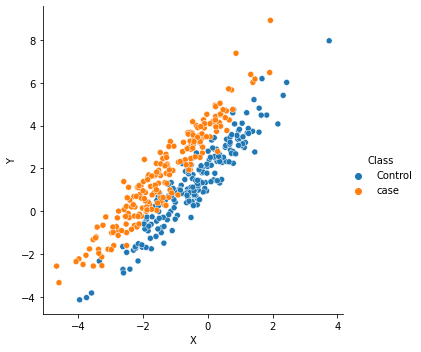

In [8]:
sns.relplot(data=df, x='X', y='Y', hue = 'Class')